### 1. Plot a bar chart showing count of individual species?

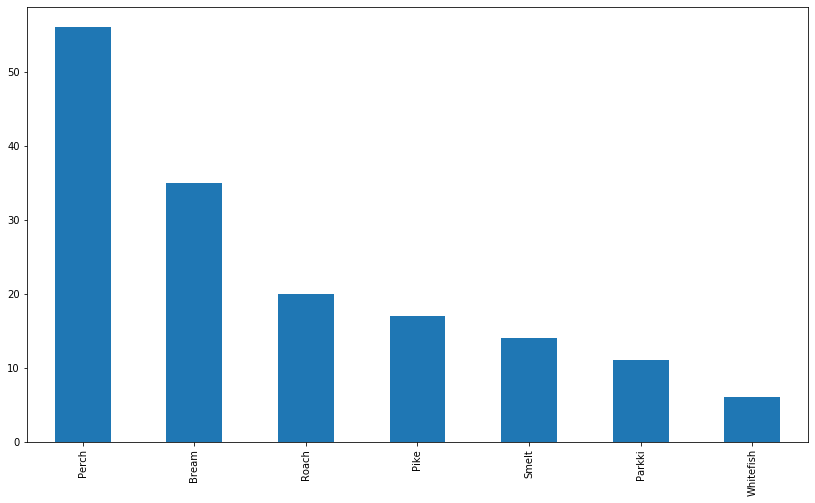

In [19]:
import pandas as pd
data=pd.read_csv(r"C:\Users\HP\Downloads\Fish_dataset.csv")

data['Species'].value_counts().plot(kind='bar',figsize=(14,8))

In [20]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### 2. Identify outliers and remove if any?

In [22]:
from scipy import stats
df=pd.DataFrame()
count=0
for i in data.iloc[:,1:]:
    df[count]=stats.zscore(data[i])
    print(data.loc[df[count].abs()>3]) # the outlier columns that are removed
    data.loc[df[count].abs()<=3] # when we print this we will get data without outliers
    count=count+1
    


    Species  Weight  Length1  Length2  Length3  Height  Width
142    Pike  1600.0     56.0     60.0     64.0   9.600  6.144
143    Pike  1550.0     56.0     60.0     64.0   9.600  6.144
144    Pike  1650.0     59.0     63.4     68.0  10.812  7.480
    Species  Weight  Length1  Length2  Length3  Height  Width
144    Pike  1650.0     59.0     63.4     68.0  10.812   7.48
    Species  Weight  Length1  Length2  Length3  Height  Width
144    Pike  1650.0     59.0     63.4     68.0  10.812   7.48
    Species  Weight  Length1  Length2  Length3  Height  Width
144    Pike  1650.0     59.0     63.4     68.0  10.812   7.48
Empty DataFrame
Columns: [Species, Weight, Length1, Length2, Length3, Height, Width]
Index: []
Empty DataFrame
Columns: [Species, Weight, Length1, Length2, Length3, Height, Width]
Index: []


### 3. Build a regression model and print regression equation?

In [23]:
from sklearn import linear_model

category={'Bream':1,'Roach':2,'Whitefish':3,'Parkki':4,'Perch':5,'Pike':6,'Smelt':7}
data['Species']=data['Species'].map(category)

x=data.drop(['Species'],axis=1)
y=data['Species']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
i=reg.intercept_
coef=reg.coef_
print('Intercept: \n', i)
print('Coefficients: \n', coef)

Intercept: 
 7.251504804572104
Coefficients: 
 [ 0.00291077  0.67698785  0.63326202 -1.16524472 -0.03756364 -0.79716442]


In [25]:
# equation
print("Linear Equation : Species=(",coef[0],") W + (",coef[1],") L1 + (",coef[2],") L2 + (",coef[3],") L3 + (",coef[4],") H + (",coef[5],") Wi +",i)

Linear Equation : Species=( 0.0029107706335938866 ) W + ( 0.6769878472817344 ) L1 + ( 0.6332620168170795 ) L2 + ( -1.1652447208691654 ) L3 + ( -0.03756364429677626 ) H + ( -0.7971644173644811 ) Wi + 7.251504804572104


### 4. What is the mean score of the model at  95% confidence interval?

In [26]:
import statsmodels.stats.api as sms
import numpy as np, scipy.stats as st

for i in data.columns:
    print(st.t.interval(0.95, len(data[i])-1, loc=np.mean(data[i]), scale=st.sem(data[i])))


(3.5631139890588437, 4.197892300249332)
(342.2544850540957, 454.3983451345835)
(24.681377342072523, 27.812962280568975)
(26.737171325622917, 30.09427521525759)
(29.4084732850266, 33.045614765287894)
(8.299623622915327, 9.642363798468317)
(4.153429662239677, 4.68154140694271)


### 5. Compare real and predicted weights and give a conclusion statement based on it?

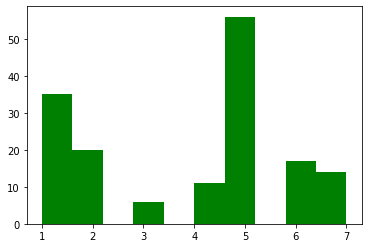

In [32]:
import matplotlib.pyplot as plt
plt.hist(y,color='green')
plt.show()



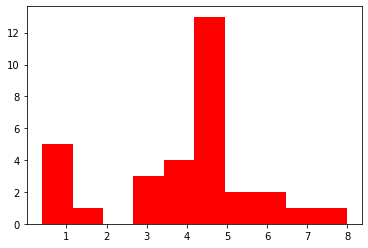

In [31]:
y_pred=reg.predict(x_test)
plt.hist(y_pred,color='red')
plt.show()